In [1]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from utilsforecast.plotting import plot_series

In [2]:
data_path = r"C:\Users\james\J_Data_Lab\Project-FXCast\data\df_investing2.csv"
df = pd.read_csv(data_path)

Seed set to 1
Seed set to 1


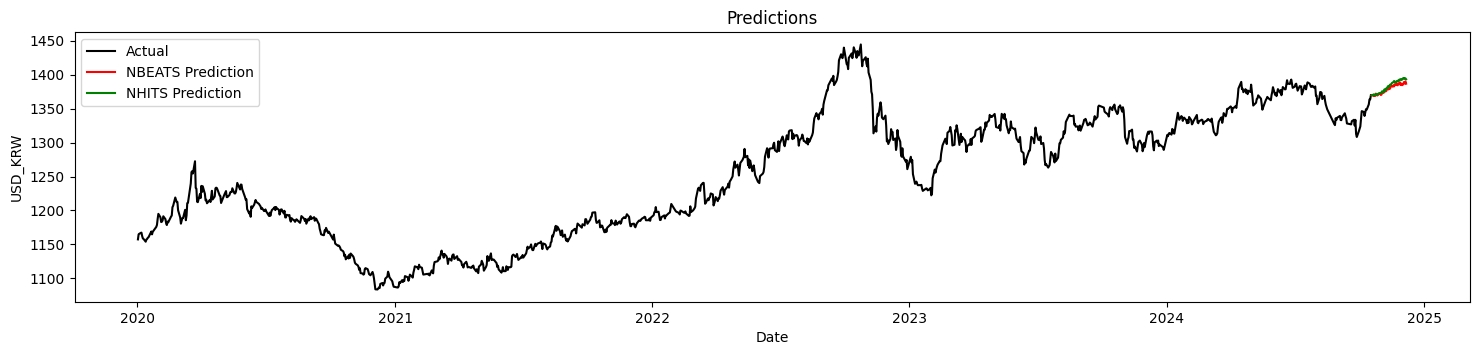

In [3]:
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

df_forecast = df[['date', 'USD_KRW 종가']].rename(columns={'date': 'ds', 'USD_KRW 종가': 'y'})
df_forecast['unique_id'] = 'USD_KRW'  
df_forecast = df_forecast[['unique_id', 'ds', 'y']]

df_forecast['ds'] = pd.to_datetime(df_forecast['ds'], format='%Y-%m-%d', errors='raise')
df_forecast = df_forecast.sort_values('ds')

split_date = df_forecast['ds'].iloc[-51]  
train_df = df_forecast[df_forecast.ds <= split_date]
test_df = df_forecast[df_forecast.ds > split_date]

horizon = len(test_df)

models = [
    NBEATS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False),
    NHITS(input_size=2 * horizon, h=horizon, max_steps=100, enable_progress_bar=False)
]

nf = NeuralForecast(models=models, freq='D')
nf.fit(df=train_df)
y_hat_df = nf.predict()

#plot_series(train_df, y_hat_df)
plt.figure(figsize=(18,3.5))
plt.plot(train_df['ds'], train_df['y'], label='Actual', color='black')
plt.plot(y_hat_df['ds'], y_hat_df['NBEATS'], label='NBEATS Prediction', color='red')
plt.plot(y_hat_df['ds'], y_hat_df['NHITS'], label='NHITS Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('USD_KRW')
plt.title('Predictions')
plt.legend()
plt.show()